# Developing Machine Learning Software
### Software Engineering, Production and Deployment

*nb. solutions for exercises in this notebook are contained in `projects/software`*

## Code Sharing

### Problems with Jupyter

* Run-order by developer != run order of output
    * **state** of notebook not reporducible
    * $\therefore$ Not reporducible

* Not (software-) versionable
    * Source of a notebooks is json which includes output...

* Notebooks cannot sit within a live execution enviornemnt
    * not programs

* Poor support for intergration with other tools
    * debugging
    
* Does not integrate well with **python**!
    * notebooks cannot be imported
    * notebooks cannot be shared, partioned, refactored
    

#### Run order

In [4]:
print(x)

5


In [3]:
x = 5

### Libraries & Utilities

* `def`, parameters should be variables in reigion of common code which can vary
    * default arguments for all fixed literals
        * col=0
    * and for conditions
    
* lift defs into their module
    * & import

* Notebookks should read as *descriptions* of the problme
    * the solution (algorithm) is irrelevant
    * 

In [111]:
from IPython.display import Markdown

Markdown(f'''
```python
{ open('eda.py').read() }
```
''')


```python
import seaborn as sns
import numpy as np

def plot_compare(df, features, target):
    X = df[features].values
    y = df[target].values

    sns.distplot(X, hist=False, label='All')
    
    for e in np.unique(y):
        sns.distplot(X[ y == e ], hist=False, label=e)
```


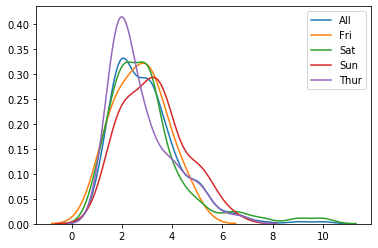

In [29]:
import seaborn as sns
import eda

eda.plot_compare(sns.load_dataset('tips'), 'tip', 'day')

#### sys.argv

Python scripts (`python myscript.py arg1 arg2`) may receive arguments.

The `sys.argv[0]` argument contains the file name, `1` and above correspond to arguments passed when the script was executed. 


In [1]:
import sys

sys.argv

['/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py',
 '-f',
 '/data/home/mjb/.local/share/jupyter/runtime/kernel-97024261-bdbc-4521-aa34-4e217d0006e9.json']

### Execise

* create a python file `train.py` which trains a model & predicts using features aquired from `sys.argv`

## Model Sharing

#### Pickle

* pickle can serialize aboitary data structures in python
    * complex data memeory structure
    * made into sequence of bytes
    * and from those bytes, reassmebles

In [65]:
import pickle

In [66]:
dbytes = pickle.dumps({
    'age': 18,
    'name': 'Micheal'
})

dbytes

b'\x80\x03}q\x00(X\x03\x00\x00\x00ageq\x01K\x12X\x04\x00\x00\x00nameq\x02X\x07\x00\x00\x00Michealq\x03u.'

In [67]:
pickle.loads(dbytes)

{'age': 18, 'name': 'Micheal'}

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets

X, y = datasets.load_boston(True)

model = LinearRegression().fit(X, y)  

model.score(X, y)

0.7406426641094095

In [69]:
pickle.dumps(clf)[:10]

b'\x80\x03csklearn'

In [70]:
pickle.dump(clf, open('saved_model.pkl', 'wb'))

In [71]:
from glob import glob as showfiles

showfiles('*.pkl')

['iris_logreg_weights.pkl', 'saved_model.pkl']

In [72]:
model = pickle.load(open('saved_model.pkl', 'rb'))

In [74]:
model.score(X, y)

0.7406426641094095

### Exericse:

* In your `train.py` file save the model you've trained
* Create `main.py` which loads the model and performs a prediction using `sys.argv` features

## User Inferfaces

### Command Line & Notebook Input

In [6]:
features = [
    'Crime', 'Planning', 
    'Residential%', 'Riverside', 
    'Pollution', 'Rooms', 
    'Pre1940%', 'EmploymentDist', 
    'HighwayDist', 'Tax', 'TeacherRatio', 
    'RacialMix', 'Poor%'
]

target = ['HousePrice']

In [7]:
x = list(X[1, :])
x[:5], y[1]

([0.02731, 0.0, 7.07, 0.0, 0.469], 21.6)

In [8]:
x = [input(f'{q} [{x[i]}]? ') or x[i] for i, q in enumerate(features)]

Crime [0.02731]?  0.03
Planning [0.0]?  
Residential% [7.07]?  
Riverside [0.0]?  
Pollution [0.469]?  
Rooms [6.421]?  
Pre1940% [78.9]?  
EmploymentDist [4.9671]?  
HighwayDist [2.0]?  
Tax [242.0]?  
TeacherRatio [17.8]?  
RacialMix [396.9]?  
Poor% [9.14]?  


In [9]:
x[:5]

['0.03', 0.0, 7.07, 0.0, 0.469]

Prepare `x` for use with the model...

In [10]:
x = list(map(float, x))

In [14]:
yhat,  = model.predict([x]).round()

print(f'${yhat * 1000:,}')

$25,000.0


### Web Interfaces

#### HTML Forms to Obtain Features

In [154]:
from IPython.display import HTML

questions = [
    f'<label>{q}?<input style="position: absolute; left: 300px" value="{x[i]}"/></label>' 
     for i, q in enumerate(features)
]    
    
HTML(f'''
<div id="html-form-example">
    <h4> Housing Form </h4>
    <p style="margin:1em"><em>complete the form for a house price estimate</em></p>
    <form action="/" method="post", onsubmit="return false;">
        {str.join('<br/>', questions)}
        <div><button type="submit">Predict</button></div>
    </form>
</div>
''')

#### Web Servers

A browser and web server is needed for a web form to provide information to a python script. The webserver is the program which sends the browser the form for display, and the browser sends the form content back.

The machine which runs the webserver program also hosts your python script and enables this script to receive the form data.

### Exercise

* In `main.py`, create a command line interface (using `input()`) to collect features
    * create `prepare.py` which contains a `def prep` which accepts `input()`'d strings
    * create `ui.py` which contains a `def ask` which runs `input()` and `prepare()`'s the result
    
* EXTRA: 
    * create a web-form version

## Unit Testing

In [28]:
assert True

In [30]:
assert False, "Condition was False"

AssertionError: Condition was False

In [24]:
assert 0 < model.predict([[0] * len(features)]) < 100

In [27]:
assert all([isinstance(e, float) for e in x])

### Exercise

* Create a file called `verify.py`which 
    * loads your saved model and `assert`s key invarients and required conditions on good-behaviour
    * loads your `prep` function and `assert`s key input->output expectations

### Aside: Cross-Platform Deployment with ONNX


ONNX for SciKit

In [50]:
!pip install -q onnxmltools onnxruntime onnx skl2onnx

Training Time:

In [34]:
# Convert into ONNX format with onnxmltools
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

X_shape = [('iris_features', FloatTensorType([1, 4]))]

onx = convert_sklearn(clf, initial_types=X_shape)

In [35]:
open("rf_iris.onnx", "wb").write(onx.SerializeToString())

706

Prediction Time

In [45]:
X[0, 0:4]

array([5.1, 3.5, 1.4, 0.2])

In [48]:
import onnxruntime as rt
import numpy as np

X_test = X[0, :].reshape(1, -1)

sess = rt.InferenceSession("rf_iris.onnx")

input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name

pred_onx = sess.run([label_name], {
    input_name: X_test.astype(np.float32)
})[0]

In [49]:
pred_onx

array([0], dtype=int64)